# Neighborhoods in Toronto_1

### Build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

#### Parsing the HTML

In [1]:
import numpy as np
import pandas as pd
import json
!conda install -c anaconda beautifulsoup4

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi:         2019.11.28-py36_0     conda-forge --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h516909a_0     conda-forge --> 1.1.1-h7b6447c_0  anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2019.11.27-0      anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

soup = BeautifulSoup(website_url,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xg14cgpAICkAACTlXCIAAAAX","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":933624196,"wgRevisionId":933624196,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

#### Read the HTML into dataframe

In [4]:
dataframe = pd.read_html(str(soup))[0]

In [5]:
dataframe.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [6]:
dataframe = dataframe.loc[dataframe["Borough"] != "Not assigned"]
dataframe.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


#### Combine postcodes having more than 1 neighborhood

In [7]:
dataframe = dataframe.groupby(["Postcode","Borough"])["Neighborhood"].apply(list)
dataframe = dataframe.sample(frac=1).reset_index()
dataframe["Neighborhood"]=dataframe["Neighborhood"].str.join(", ")
dataframe.head()

,Postcode,Borough,Neighborhood
0,M2M,North York,"Newtonbrook, Willowdale"
1,M4J,East York,East Toronto
2,M3B,North York,Don Mills North
3,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St..."
4,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi..."


#### Replace "Not assigned" Neighborhood to its Borough

In [8]:
dataframe.loc[dataframe["Neighborhood"] == "Not assigned"]

,Postcode,Borough,Neighborhood
14,M9A,Queen's Park,Not assigned


In [9]:
dataframe.Neighborhood.replace("Not assigned",dataframe.Borough,inplace=True)

In [10]:
dataframe.head()

,Postcode,Borough,Neighborhood
0,M2M,North York,"Newtonbrook, Willowdale"
1,M4J,East York,East Toronto
2,M3B,North York,Don Mills North
3,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St..."
4,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi..."


In [11]:
dataframe.shape

(103, 3)

### Merging latitude and logitude using .csv file

#### read geo data using given link

In [14]:
geo_data=pd.read_csv("http://cocl.us/Geospatial_data",header=0)

In [15]:
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
toronto_df=dataframe.merge(geo_data,left_on="Postcode",right_on="Postal Code")

In [17]:
toronto_df.head()

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M2M,North York,"Newtonbrook, Willowdale",M2M,43.789053,-79.408493
1,M4J,East York,East Toronto,M4J,43.685347,-79.338106
2,M3B,North York,Don Mills North,M3B,43.745906,-79.352188
3,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",M1V,43.815252,-79.284577
4,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",M4V,43.686412,-79.400049


#### clean data as per the requirement

In [18]:
toronto_df=toronto_df.drop("Postal Code",axis=1)

In [19]:
print(type(toronto_df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
toronto_df=toronto_df.rename(columns={"Postcode":"PostalCode"})

In [21]:
toronto_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M2M,North York,"Newtonbrook, Willowdale",43.789053,-79.408493
1,M4J,East York,East Toronto,43.685347,-79.338106
2,M3B,North York,Don Mills North,43.745906,-79.352188
3,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577
4,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


In [22]:
toronto_df=toronto_df[toronto_df["Borough"].str.contains("Toronto")]

In [23]:
toronto_neighborhood=toronto_df.reset_index(drop=True)
toronto_neighborhood.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049
1,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
2,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846
3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [24]:
toronto_neighborhood.shape

(39, 5)

### import necessary libraries for exploration and clustering

In [25]:
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print("Libraries imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0      anaconda --> 2019.11.28-hecc5488_0 conda-forge
    certifi:         2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0     conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported


### Use Geopy to get the latitude and longitude of toronto

In [26]:
address = 'Canada,toronto'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.653963, -79.387207.


### Create a map of Toronto with neighborhoods superimposed on top.

In [27]:
map_toronto=folium.Map(location=[latitude,longitude],zoom_start=10)
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

### Define Foursquare Credentials and Version

In [28]:
CLIENT_ID = 'GYMFJZLPXFWQ1DMTRZDNYF2ENYIWGX4LRJH02OBSLHEVKPGM'
CLIENT_SECRET = 'KWTXVRYM4SWZ3B212BHECCJJDICBKYU3EAUNSXH3R4L1MJ2L'
VERSION = '20180605'
LIMIT=100
radius=500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYMFJZLPXFWQ1DMTRZDNYF2ENYIWGX4LRJH02OBSLHEVKPGM
CLIENT_SECRET:KWTXVRYM4SWZ3B212BHECCJJDICBKYU3EAUNSXH3R4L1MJ2L


#### Let's explore neighborhood in toronto

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
        LIMIT)
         # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### now create a dataframe for all the neighborhood of toronto using above function

In [30]:
toronto_venues = getNearbyVenues(names=toronto_neighborhood['Neighborhood'],
                                   latitudes=toronto_neighborhood['Latitude'],
                                   longitudes=toronto_neighborhood['Longitude']
                                  )

Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Central Bay Street
Stn A PO Boxes 25 The Esplanade
Lawrence Park
The Beaches
Davisville North
Brockton, Exhibition Place, Parkdale Village
Little Portugal, Trinity
Harbourfront
Berczy Park
Studio District
Chinatown, Grange Park, Kensington Market
Roselawn
Cabbagetown, St. James Town
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Christie
Davisville
Forest Hill North, Forest Hill West
Moore Park, Summerhill East
Queen's Park
Harbourfront East, Toronto Islands, Union Station
St. James Town
Design Exchange, Toronto Dominion Centre
The Danforth West, Riverdale
First Canadian Place, Underground city
Commerce Court, Victoria Hotel
Runnymede, Swansea
Ryerson, Garden District
Church and Wellesley
Rosedale
North Toronto West
Dovercourt Village, Dufferin
High Park, The Junction South
Adelaide, King, Richmond
The Beaches West, India Bazaar
Parkdale, Roncesvalles
The Annex,

In [31]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,The Market By Longo’s,43.686711,-79.399536,Supermarket
1,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,LCBO,43.686991,-79.399238,Liquor Store
2,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,Union Social Eatery,43.687895,-79.394916,American Restaurant
3,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,Mary Be Kitchen,43.687708,-79.395062,Restaurant
4,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,Daeco Sushi,43.687838,-79.395652,Sushi Restaurant


**lets check how many venues were returned for each neigborhood**

In [32]:
toronto_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton, Exhibition Place, Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",18,18,18,18,18,18
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,86,86,86,86,86,86
"Chinatown, Grange Park, Kensington Market",92,92,92,92,92,92
Christie,16,16,16,16,16,16


**Let's find out how many unique categories can be curated from all the returned venues**

In [33]:
print("there are {} unique categories ".format(len(toronto_venues["Venue Category"].unique())))

there are 239 unique categories 


### Analyze each neighborhood

In [34]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
toronto_onehot.shape

(1731, 239)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category¶

In [36]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,...,0.000000,0.00000,0.00,0.011628,0.000000,0.000000,0.011628,0.000000,0.000000,0.00
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.054348,0.000000,0.054348,0.010870,0.000000,0.000000,0.00
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.011628,0.000000,0.011628,0.011628,0.00


In [37]:
toronto_grouped.shape

(39, 239)

#### Let's print each neighborhood along with the top 5 most common venues

In [38]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.08
1   Steakhouse  0.04
2          Bar  0.04
3         Café  0.04
4        Hotel  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2                Café  0.04
3              Bakery  0.04
4  Seafood Restaurant  0.04


----Brockton, Exhibition Place, Parkdale Village----
               venue  freq
0               Café  0.14
1     Breakfast Spot  0.10
2        Coffee Shop  0.10
3  Convenience Store  0.05
4       Intersection  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1      Farmers Market  0.06
2         Pizza Place  0.06
3                Park  0.06
4          Comic Shop  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
                 venue  freq
0      Airport Service  0.17
1       Airport Lounge  0.11
2 

#### Let's put that into a pandas dataframe, creating function

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Bar,Steakhouse,Café,Hotel,Restaurant,Burger Joint,Sushi Restaurant,Asian Restaurant,Thai Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Seafood Restaurant,Café,Bakery,Steakhouse,Beer Bar,Cheese Shop,Beach
2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Pet Store,Bakery,Gym,Furniture / Home Store,Intersection,Italian Restaurant,Convenience Store
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Garden Center,Burrito Place,Fast Food Restaurant,Farmers Market,Auto Workshop,Spa,Restaurant,Garden,Smoke Shop
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Plane,Boat or Ferry,Airport,Airport Food Court,Airport Gate,Coffee Shop,Harbor / Marina


### Cluster Neighborhoods

In [44]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood',axis=1)

In [59]:
# find the best k (number of clusters) regarding the inertia_ score
#
Ks = 10 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

array([3.02900919, 2.29508135, 1.97186901, 1.72038904, 1.49122237,
       1.39686701, 1.20892912, 1.10498906, 1.03852808])

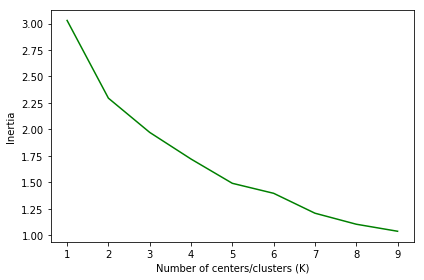

In [60]:
import matplotlib.pyplot as plt
# plot the inertia with the different k to find the better balance
#
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [ ]:
# I decide to choose 7 as it is a good balance between clutering reability and inertia score
kmeans = KMeans(n_clusters=5, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
kmeans.labels_[0:40] 

In [61]:
# Display the information on the centers
print("number of clusters:", len(kmeans.cluster_centers_))
#print("cluster center:" , kmeans.cluster_centers_)
print("number of iterations:", kmeans.n_iter_)
print("inertia (Sum of squared distances of samples to cluster center): ", kmeans.inertia_)

number of clusters: 9
number of iterations: 3
inertia (Sum of squared distances of samples to cluster center):  1.0385280826435164


### Visualize clusters on map

In [62]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,5,Pub,Coffee Shop,Bagel Shop,American Restaurant,Sushi Restaurant,Fried Chicken Joint,Sports Bar,Restaurant,Supermarket,Pizza Place
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,5,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Ice Cream Shop,Japanese Restaurant,Bakery,Juice Bar,Salad Place
8,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,5,Coffee Shop,Restaurant,Café,Seafood Restaurant,Japanese Restaurant,Beer Bar,Hotel,Cocktail Bar,Sandwich Place,Lounge
9,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,6,Lawyer,Park,Bus Line,Swim School,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
16,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Pub,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store


In [63]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto are 43.653963, -79.387207.


In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(len(toronto_merged['Cluster Labels'].value_counts()))
ys = [i + x + (i*x)**2 for i in range(len(toronto_merged['Cluster Labels'].value_counts()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
count=0

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '/ Cluster is ' + str(cluster), parse_html=True)  
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyze Cluster 1

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Farmers Market,Seafood Restaurant,Café,Bakery,Steakhouse,Beer Bar,Cheese Shop,Beach
34,Downtown Toronto,0,Café,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Chinese Restaurant,Bar,Coffee Shop,Mexican Restaurant,Bakery,Cocktail Bar
85,Central Toronto,0,Clothing Store,Coffee Shop,Sporting Goods Shop,Burger Joint,Salon / Barbershop,Restaurant,Rental Car Location,Café,Chinese Restaurant,Yoga Studio
86,West Toronto,0,Bakery,Supermarket,Pharmacy,Art Gallery,Bus Stop,Café,Recording Studio,Bar,Bank,Middle Eastern Restaurant
101,East Toronto,0,Light Rail Station,Garden Center,Burrito Place,Fast Food Restaurant,Farmers Market,Auto Workshop,Spa,Restaurant,Garden,Smoke Shop


### Analyze Cluster 2

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,East Toronto,1,Trail,Health Food Store,Pub,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store


### Analyze cluster 3

In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Central Toronto,2,Park,Playground,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
84,Downtown Toronto,2,Park,Trail,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store


### Analyze Cluster 4

In [72]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Central Toronto,3,Park,Jewelry Store,Trail,Sushi Restaurant,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant


### Analyze Cluster 5

In [71]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Central Toronto,4,Ice Cream Shop,Pool,Garden,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### Analyze Cluster 6

In [70]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,5,Pub,Coffee Shop,Bagel Shop,American Restaurant,Sushi Restaurant,Fried Chicken Joint,Sports Bar,Restaurant,Supermarket,Pizza Place
5,Downtown Toronto,5,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Ice Cream Shop,Japanese Restaurant,Bakery,Juice Bar,Salad Place
8,Downtown Toronto,5,Coffee Shop,Restaurant,Café,Seafood Restaurant,Japanese Restaurant,Beer Bar,Hotel,Cocktail Bar,Sandwich Place,Lounge
24,West Toronto,5,Café,Coffee Shop,Breakfast Spot,Pet Store,Bakery,Gym,Furniture / Home Store,Intersection,Italian Restaurant,Convenience Store
25,West Toronto,5,Bar,Asian Restaurant,Restaurant,Coffee Shop,Café,Pizza Place,Men's Store,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop
26,Downtown Toronto,5,Coffee Shop,Bakery,Pub,Park,Mexican Restaurant,Breakfast Spot,Restaurant,Café,Cosmetics Shop,Shoe Store
30,East Toronto,5,Café,Coffee Shop,Brewery,Gastropub,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Music Store,Sandwich Place
37,Downtown Toronto,5,Coffee Shop,Café,Italian Restaurant,Pizza Place,Bakery,Park,Pub,Chinese Restaurant,Restaurant,Liquor Store
45,Downtown Toronto,5,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Diner,Restaurant,Candy Store,Baby Store,Convenience Store
49,Central Toronto,5,Sandwich Place,Pizza Place,Dessert Shop,Sushi Restaurant,Gym,Coffee Shop,Italian Restaurant,Toy / Game Store,Café,Deli / Bodega


### Analyze Cluster 7

In [69]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Central Toronto,6,Lawyer,Park,Bus Line,Swim School,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
